# Preprocessing data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Install openpyxl dan pandas
!pip install openpyxl
!pip install pandas
# PURPOSE: to prevent any plot open in a new tab
%matplotlib inline
pd.pandas.set_option('display.max_column', None)

In [ ]:
dataset= pd.read_csv('/content/MLBB_kompetitif_Using.csv')
dataset.head()

,nama_hero,role,win_rate,pick_rate,ban_rate
0,Terizla,fighter,0.256270,0.15,0.02
1,Martis,fighter,0.099530,0.15,0.02
2,Grock,tank,0.310345,0.14,0.02
3,Carmilla,support,0.786050,0.08,0.02
4,Irithel,marksman,0.610502,0.38,0.03


Untuk menunjukan imbalnce data


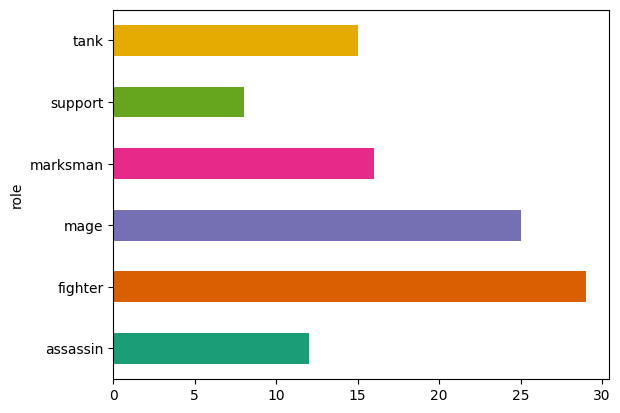

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('role').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nama_hero  105 non-null    object 
 1   role       105 non-null    object 
 2   win_rate   105 non-null    float64
 3   pick_rate  105 non-null    float64
 4   ban_rate   105 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.2+ KB


# Olah data kembali

In [ ]:
nama_kolom_delete = ['pick_rate', 'win_rate', 'nama_hero']
databaru = dataset.drop(columns=nama_kolom_delete)
print(databaru)

         role  ban_rate
0     fighter      0.02
1     fighter      0.02
2        tank      0.02
3     support      0.02
4    marksman      0.03
..        ...       ...
100  marksman     60.05
101  assassin     61.29
102   fighter      9.59
103      mage      0.53
104      mage      0.18

[105 rows x 2 columns]


In [ ]:
databaru.to_csv(' MLBB_kompetitif_fiturdihilangkan.csv', index=False)

undersampling databaru

In [ ]:
data=  pd.read_csv('/content/ MLBB_kompetitif_fiturdihilangkan.csv')


# Menentukan jumlah sampel minimum di setiap kelas
n_samples = data['role'].value_counts().min()

# Melakukan undersampling di setiap kelompok
undersampled_data = data.groupby('role').apply(lambda x: x.sample(n=n_samples)).reset_index(drop=True)

print(undersampled_data)


        role  ban_rate
0   assassin      0.71
1   assassin      4.48
2   assassin     24.88
3   assassin     61.29
4   assassin     11.32
5   assassin     49.46
6   assassin      2.80
7   assassin      1.68
8    fighter      0.02
9    fighter      0.02
10   fighter      0.10
11   fighter      0.14
12   fighter     10.22
13   fighter      0.13
14   fighter      0.49
15   fighter      0.07
16      mage      0.36
17      mage      0.04
18      mage      0.06
19      mage      1.67
20      mage      0.10
21      mage      0.08
22      mage     42.29
23      mage      0.69
24  marksman      0.42
25  marksman      0.03
26  marksman      0.17
27  marksman      0.50
28  marksman      0.40
29  marksman     60.05
30  marksman      0.04
31  marksman     20.35
32   support      1.36
33   support      0.21
34   support      3.84
35   support      4.37
36   support      0.29
37   support      0.02
38   support      0.07
39   support      0.11
40      tank      2.76
41      tank      0.51
42      tan

**Visualisasi data role untuk menunjukan balence data**

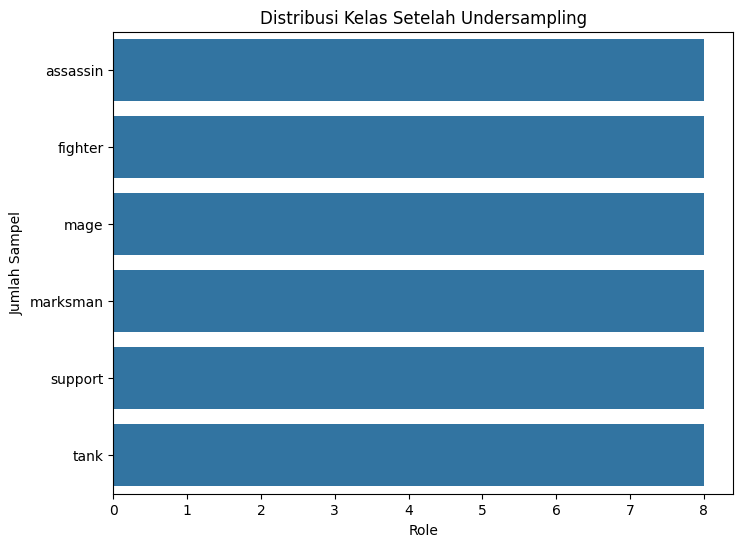

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
# Plot jumlah sampel setiap kelas setelah undersampling
plt.figure(figsize=(8, 6))
sns.countplot(undersampled_data['role'])
plt.title('Distribusi Kelas Setelah Undersampling')
plt.xlabel('Role')
plt.ylabel('Jumlah Sampel')
plt.show()

# ML model random Forest (Mengklasifikasikan role )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

#Library utk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Memisahkan fitur dan label
X = dataset.drop('role', axis=1)
y = dataset['role']


In [ ]:
# Terapkan one-hot encoding pada kolom dengan nilai kategorikal
X_encoded = pd.get_dummies(X)

# Membagi data menjadi data train dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=100)

# Inisialisasi model Random Forest dengan jumlah pohon 6
rf_model = RandomForestClassifier(n_estimators=6, random_state=42)

# Melatih model dengan data latih
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6, random_state=42)

# **Mengetes Data train**

In [ ]:
y_train_pred = rf_model.predict(X_train)

Akurasi data latih: 90.48%


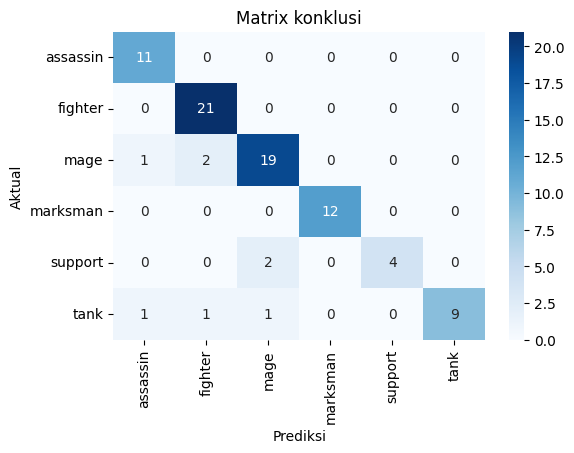

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Akurasi data latih: {:.2f}%".format(train_accuracy * 100))
#visualisasi data
matrix_konklusi = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_konklusi , annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matrix konklusi')
plt.show()

# **Mengetes data test**

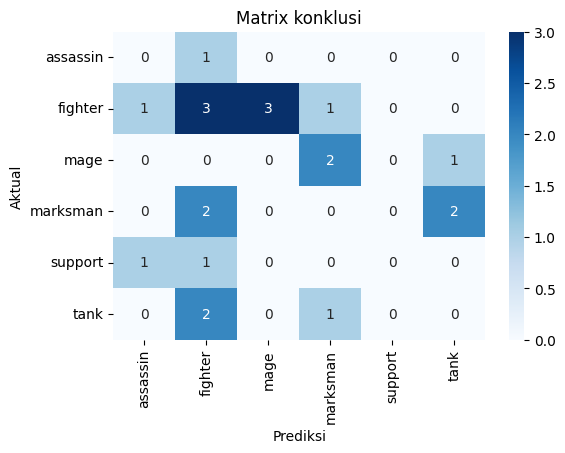

Akurasi: 14.29%


In [ ]:
y_pred = rf_model.predict(X_test)

matrix_konklusi = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_konklusi , annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matrix konklusi')
plt.show()

#Mengecek hasil akurasinya
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

# Melakukan pemilihan fitur pada dataset


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Inisialisasi objek SelectKBest dengan uji chi-square sebagai skor
selector = SelectKBest(score_func=chi2, k=1)  # Pilih 1 fitur terbaik

# Melatih selector pada data latih dan mengubah data latih menjadi subset fitur yang dipilih
X_train_selected = selector.fit_transform(X_train, y_train)

# Mendapatkan indeks fitur-fitur yang terpilih
selected_features_index = selector.get_support(indices=True)

# Mendapatkan nama fitur yang terpilih
selected_features = X_train.columns[selected_features_index]

print("Fitur terpilih:", selected_features)

Fitur terpilih: Index(['ban_rate'], dtype='object')


# Menguji data kembali

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

#Library utk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
databaru = pd.read_csv('/content/_MLBB_kompetitif_fiturdihilangkan.csv')
#Memisahkan fitur dan label
X = databaru.drop('role', axis=1)
y = databaru['role']

In [69]:
# Membagi data menjadi data train dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=100)

# Inisialisasi model Random Forest dengan jumlah pohon 6
rf_model = RandomForestClassifier(n_estimators=100, random_state=100)

# Melatih model dengan data latih
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

Akurasi data latih: 78.57%


Text(0.5, 1.0, 'Matrix konklusi')

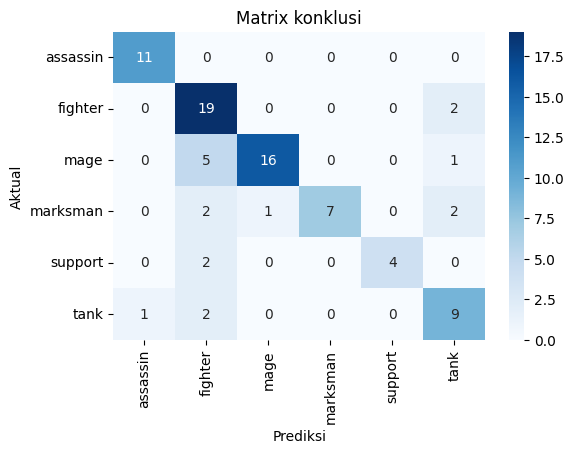

In [70]:
#Mengetes Data Train
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Akurasi data latih: {:.2f}%".format(train_accuracy * 100))
#visualisasi data
matrix_konklusi = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_konklusi , annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matrix konklusi')

Mengetes data test

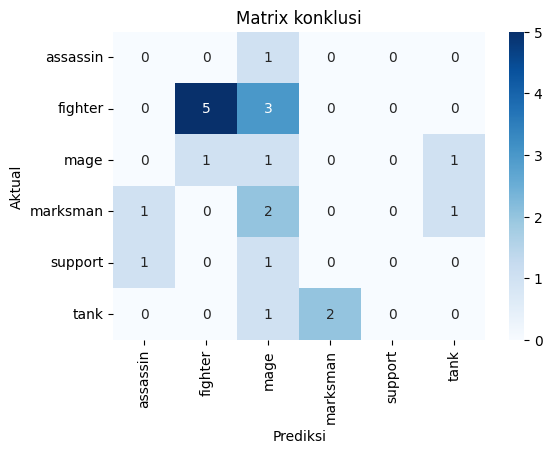

Akurasi: 28.57%


In [71]:
y_pred = rf_model.predict(X_test)

matrix_konklusi = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_konklusi , annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matrix konklusi')
plt.show()

#Mengecek hasil akurasinya
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

**Akurasi data naik dengan melakukan penyesuaian fitur data, random state, dan jumlah pohon**